In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
# sklearn's preprocessing contains our scalers:
# minmax, standard, robust
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")
import wrangle
from sklearn.model_selection import train_test_split

import env

## Exercises
### Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [18]:
#acquire data
df = wrangle.wrangle_zillow()
df


,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037
20,3,2.0,1222,290492,1951,3870.25,6037
40,2,1.0,725,37548,1953,576.47,6037
...,...,...,...,...,...,...,...
2152815,4,2.0,1484,71859,1955,1135.72,6037
2152824,2,1.0,710,175319,1940,2040.78,6111
2152831,3,2.0,1194,271536,1954,3555.73,6037
2152852,3,2.0,1917,408680,1946,4341.32,6111


In [46]:
#split data
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [47]:
#check column shape
train.shape

(1023397, 7)

In [48]:
#check column info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023397 entries, 1927212 to 55990
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1023397 non-null  int64  
 1   bathrooms   1023397 non-null  float64
 2   area        1023397 non-null  int64  
 3   tax_value   1023397 non-null  int64  
 4   year_built  1023397 non-null  int64  
 5   tax_amount  1023397 non-null  float64
 6   fips        1023397 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 62.5 MB


In [49]:
# do the thing

In [50]:
#make, fit, use
columns = ['bedrooms', 'bathrooms', 'area', 'tax_value','year_built','tax_amount','fips']

In [51]:
train_scaled.head(2)


,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,area_scaled,tax_value_scaled,year_built_scaled,tax_amount_scaled
1927212,3,2.0,2365,529671,1976,5644.78,6111,0.693686,0.114692,0.659574,0.511913
539627,4,3.0,2434,161495,1960,2103.93,6037,0.713950,0.034966,0.489362,0.189733


### Visualize distributions

## Min Max

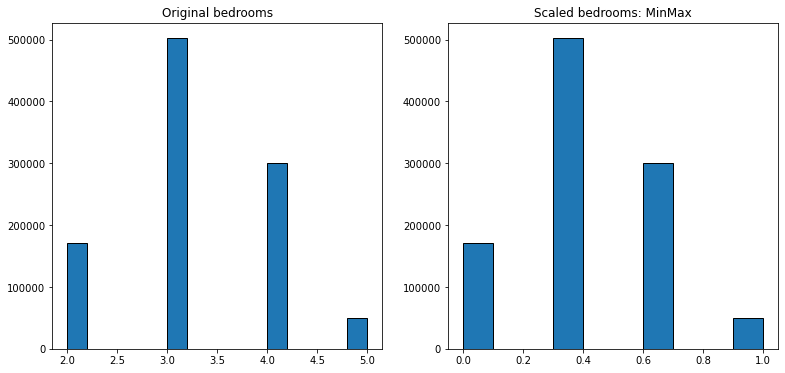

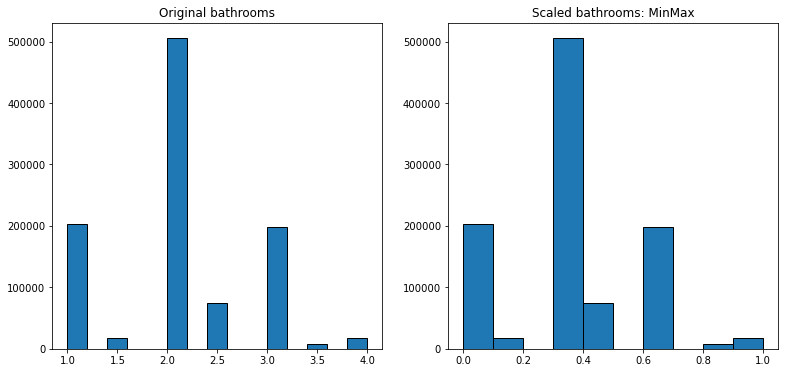

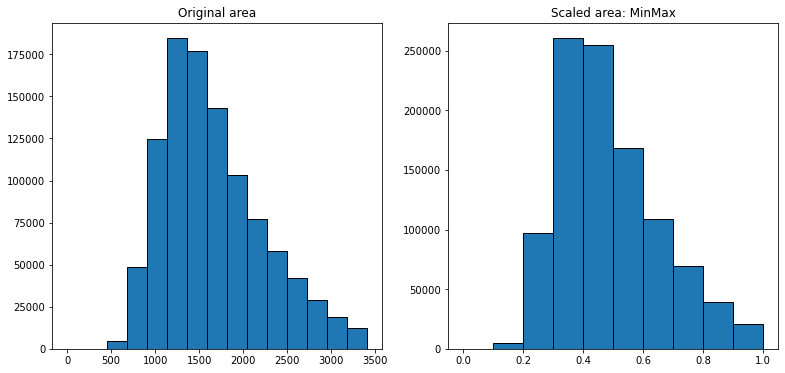

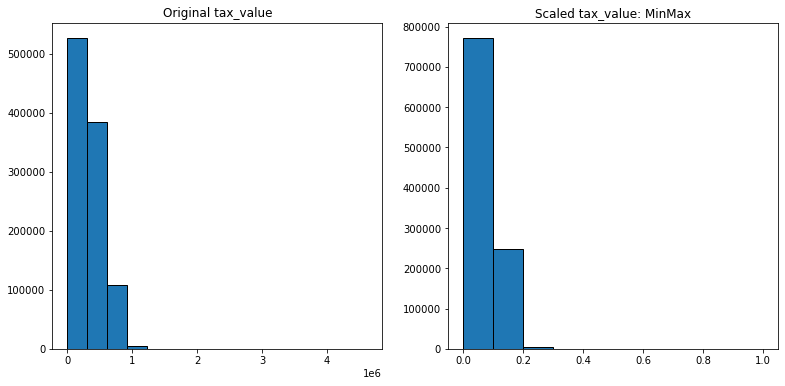

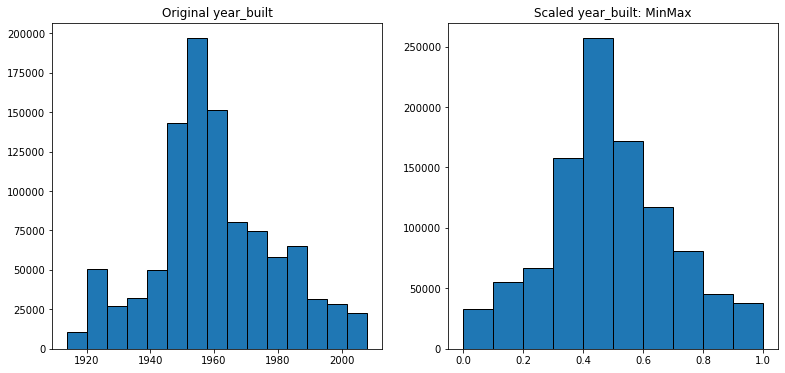

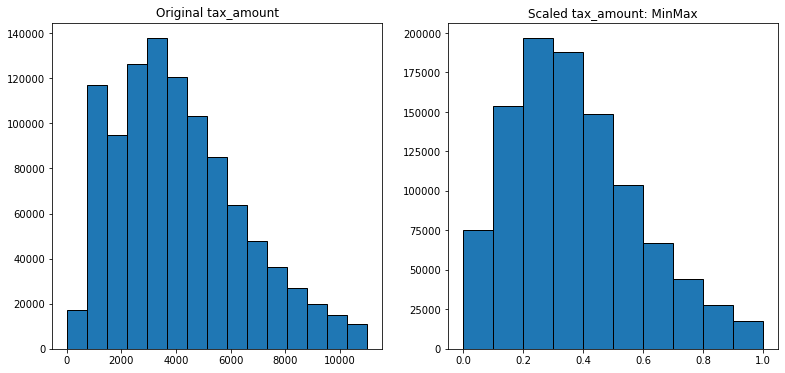

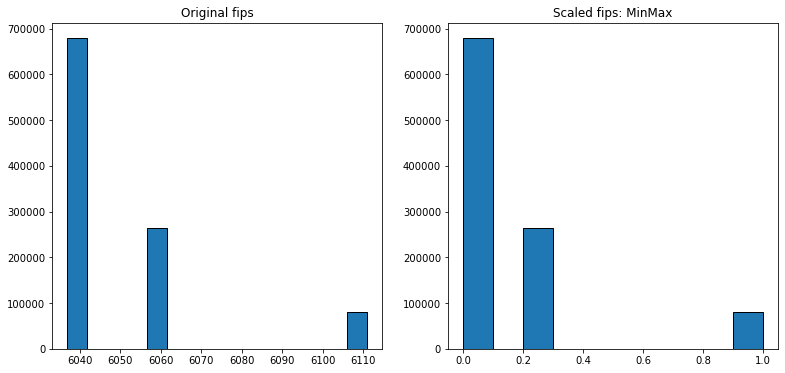

In [29]:
for col in columns:
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=15, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=10, ec='black')
    plt.title(f'Scaled {col}: MinMax')
    plt.show()

## Standard Scaler

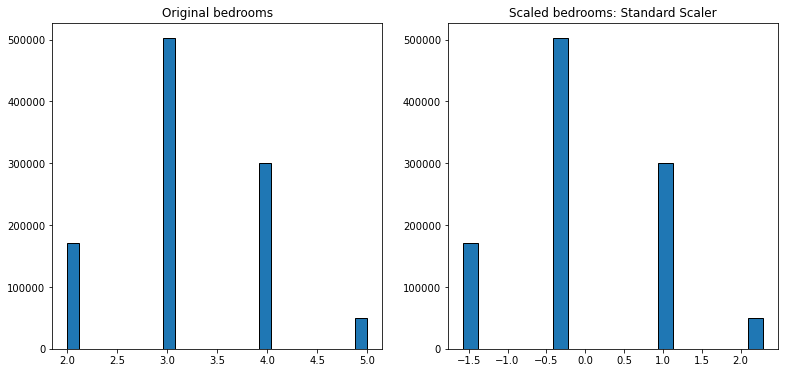

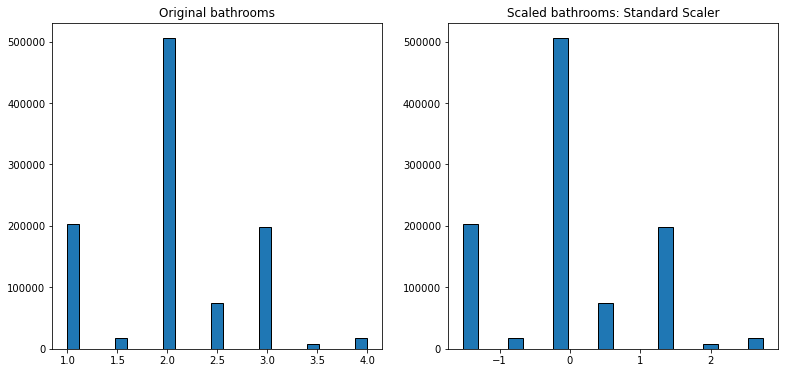

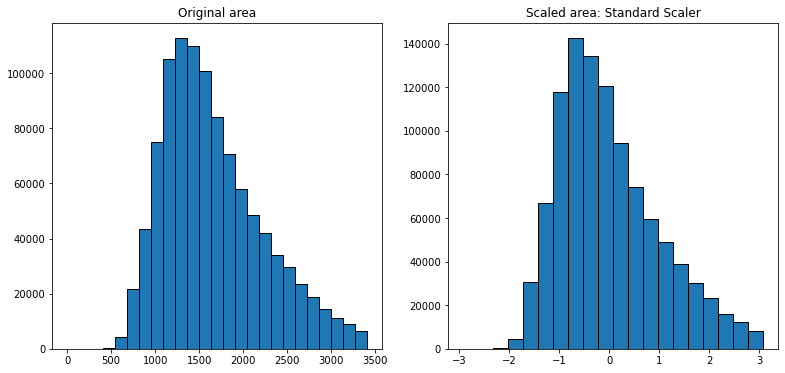

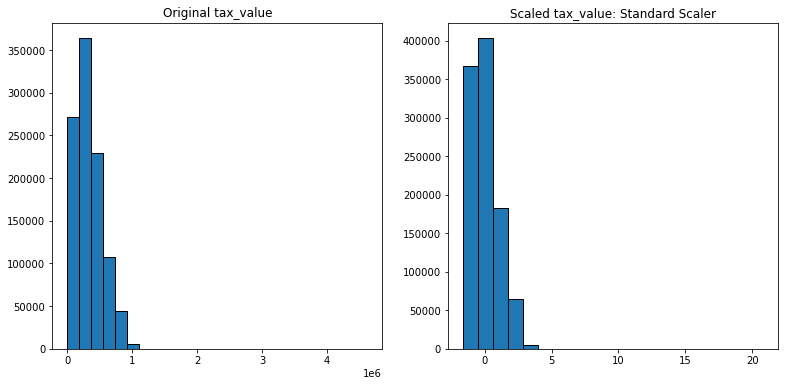

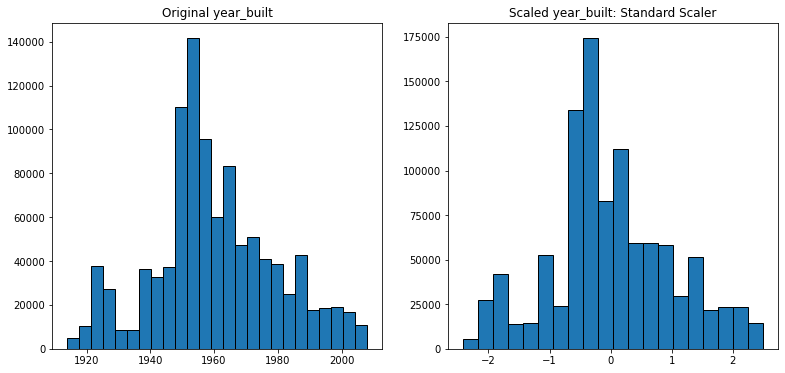

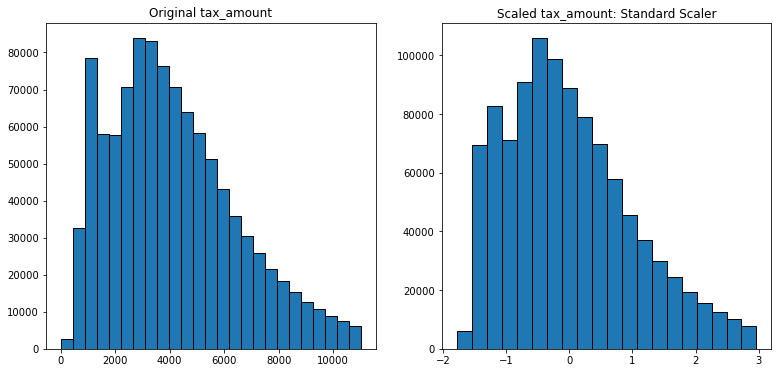

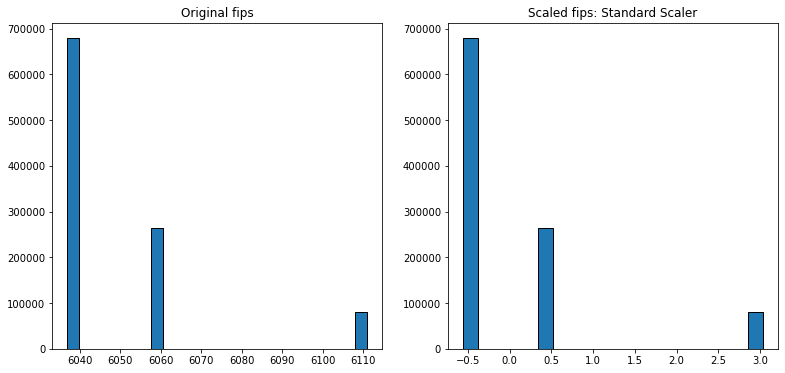

In [30]:
for col in columns:
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=20, ec='black')
    plt.title(f'Scaled {col}: Standard Scaler')
    plt.show()

## Robust

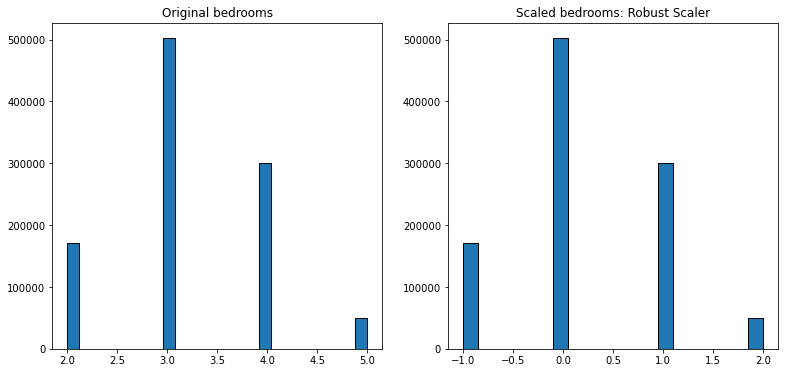

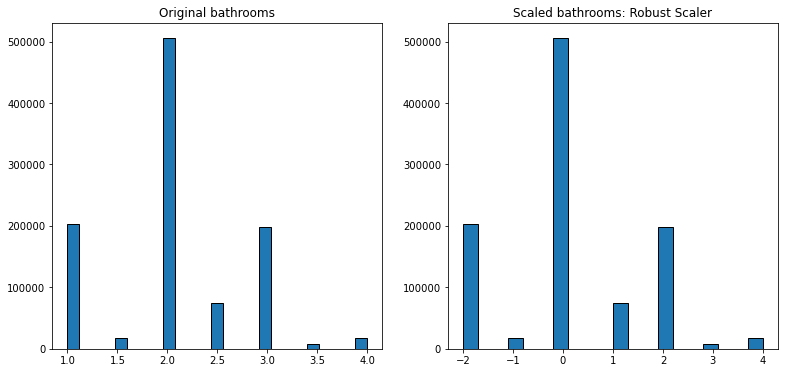

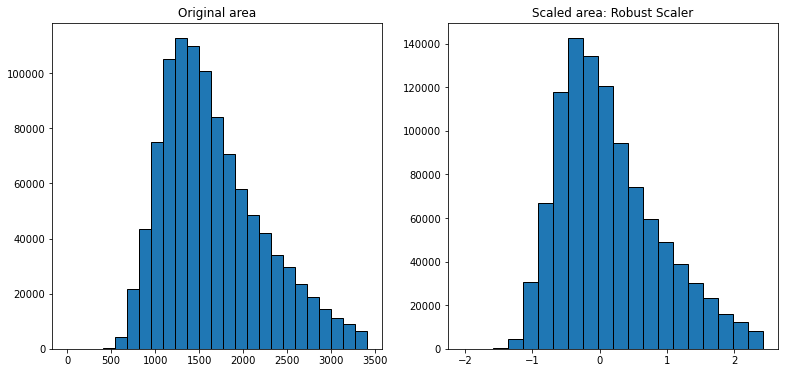

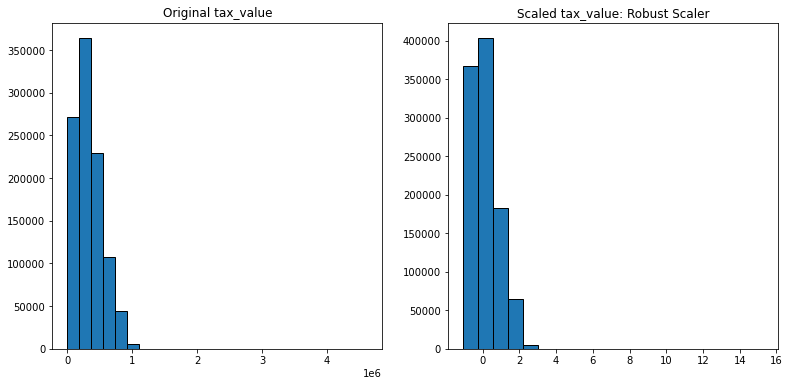

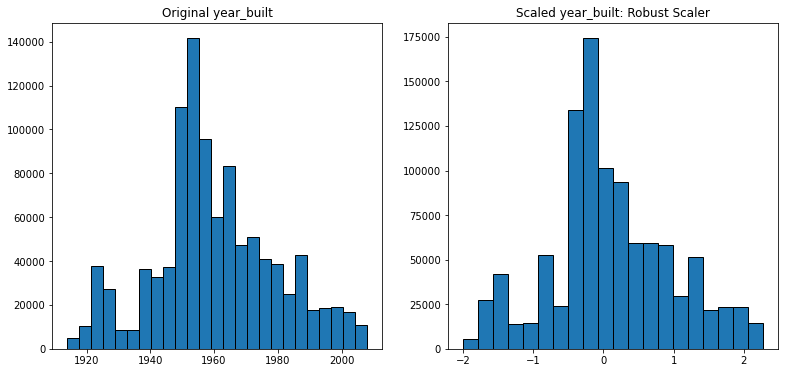

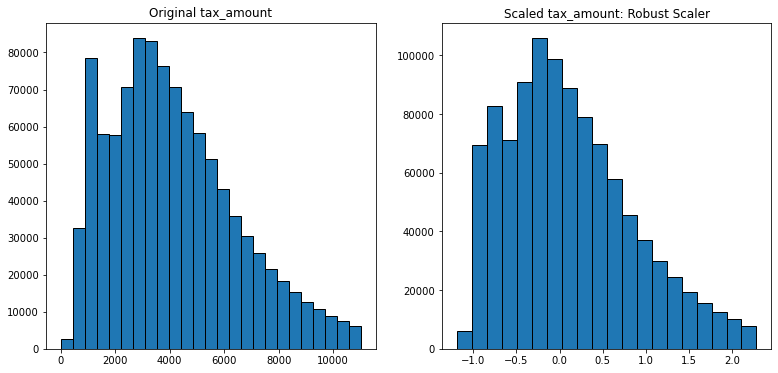

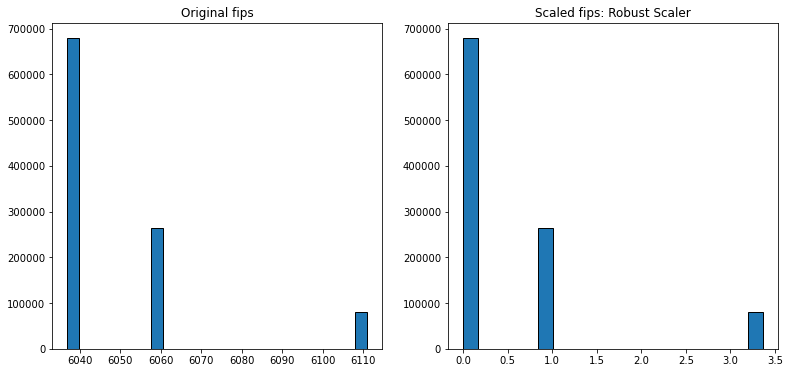

In [31]:
for col in columns:
    scaler = sklearn.preprocessing.RobustScaler()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=20, ec='black')
    plt.title(f'Scaled {col}: Robust Scaler')
    plt.show()

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

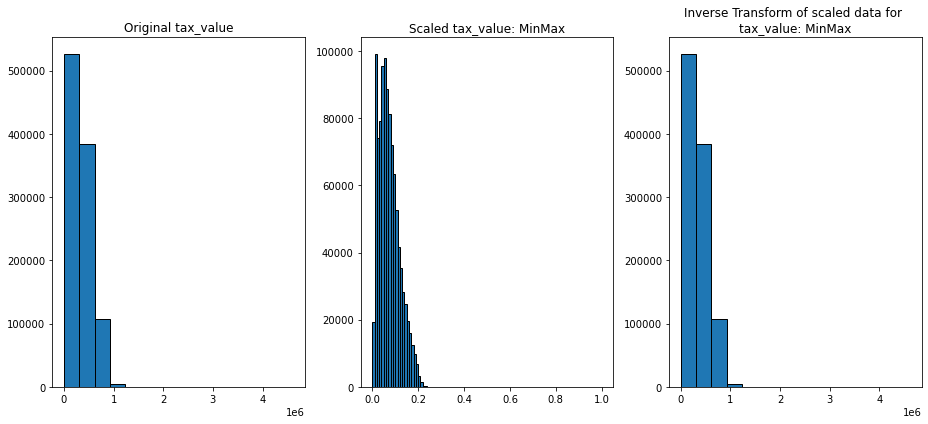

In [32]:
# for col in columns:
col = 'tax_value'
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[[col]])
train_scaled = scaler.transform(train[[col]])
inverse_train_scaled = scaler.inverse_transform(train_scaled)
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train[col], bins=15, ec='black')
plt.title(f'Original {col}')
plt.subplot(132)
plt.hist(train_scaled, bins=100, ec='black')
plt.title(f'Scaled {col}: MinMax')
plt.subplot(133)
plt.hist(inverse_train_scaled, bins=15, ec='black')
plt.title(f'Inverse Transform of scaled data for \n{col}: MinMax')
plt.tight_layout()
plt.show()

In [ ]:
#takeaway
#after aplying inverse transform method, the resulting scaled dataset is the exact same as the original data

### 3 Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

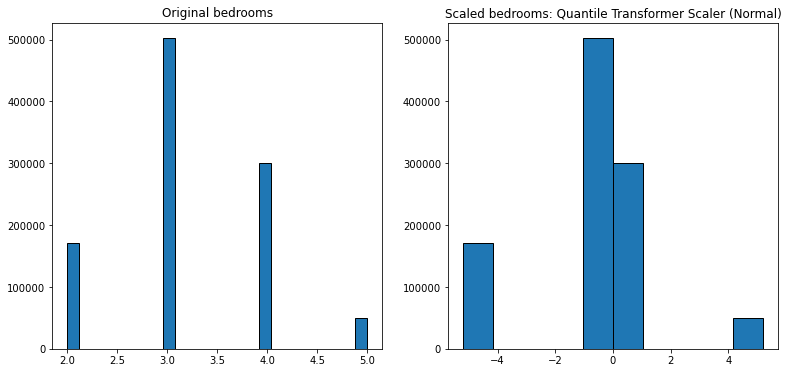

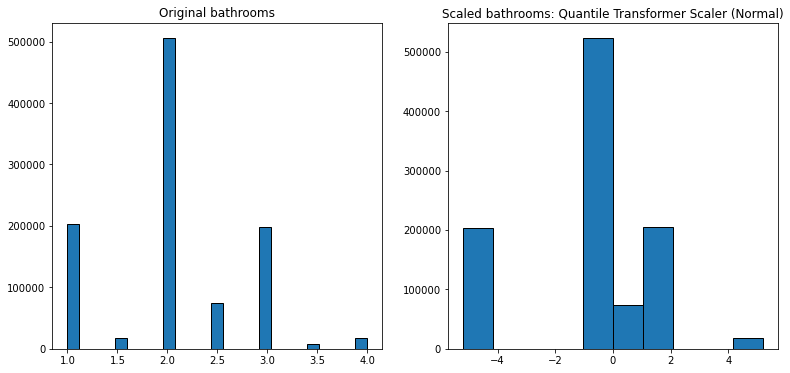

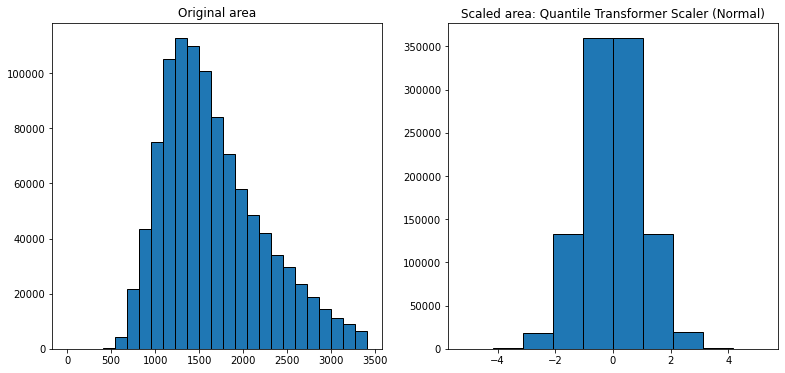

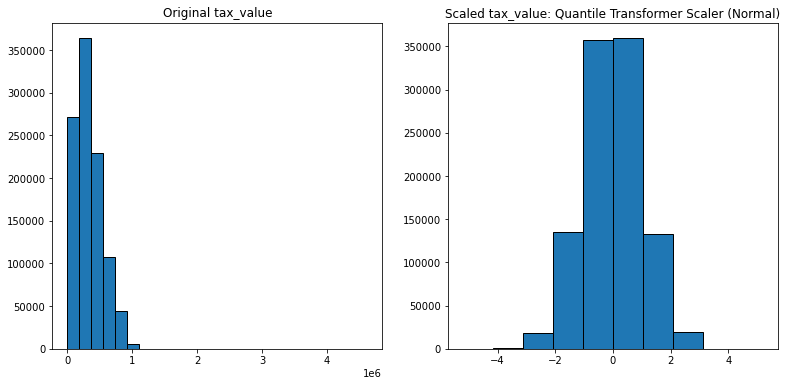

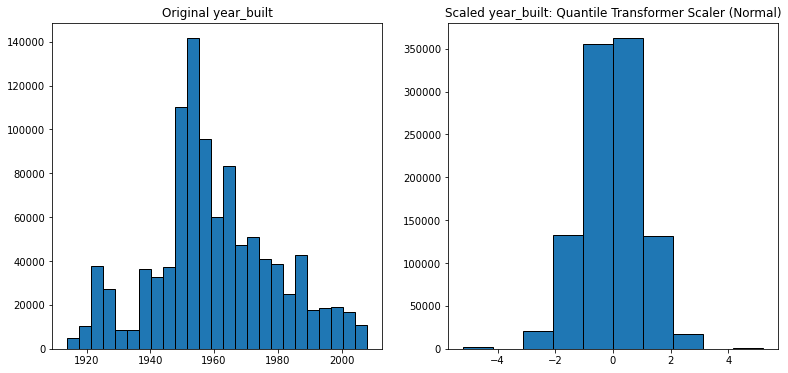

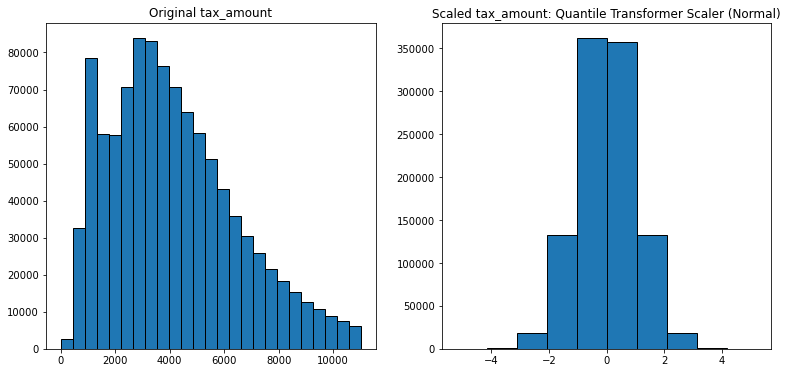

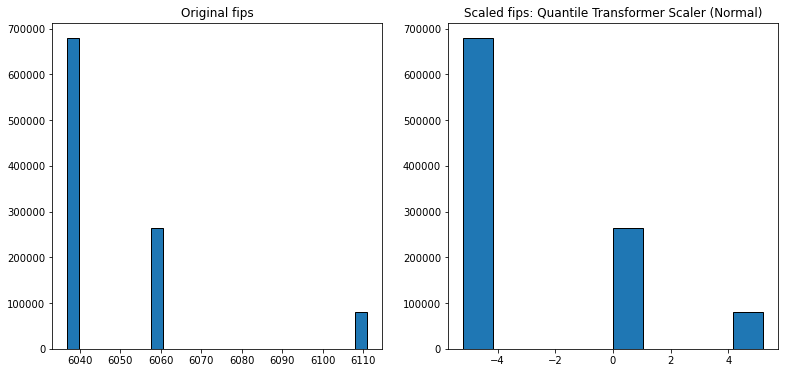

In [35]:
for col in columns:
    scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, ec='black')
    plt.title(f'Scaled {col}: Quantile Transformer Scaler (Normal)')
    plt.show()

In [ ]:
#takeaway
# after visualizing, it makes data look normalized
# the features follw a uniform or normal distribution

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


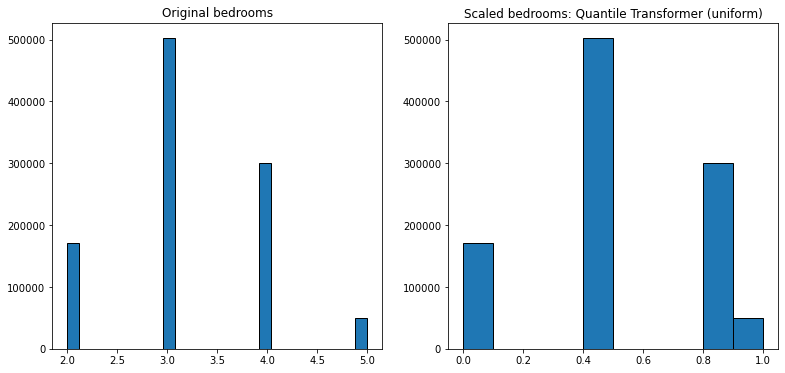

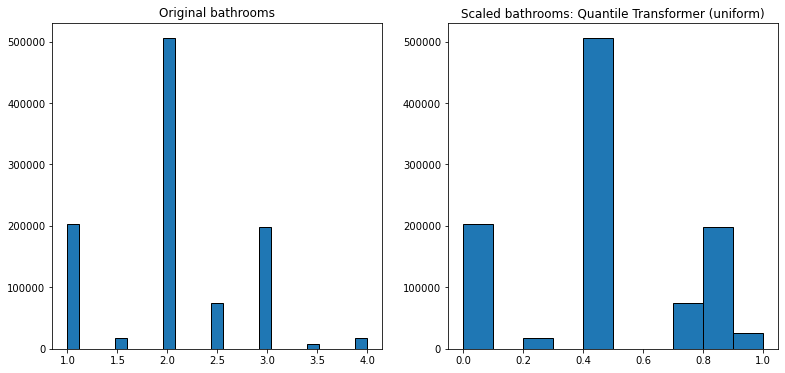

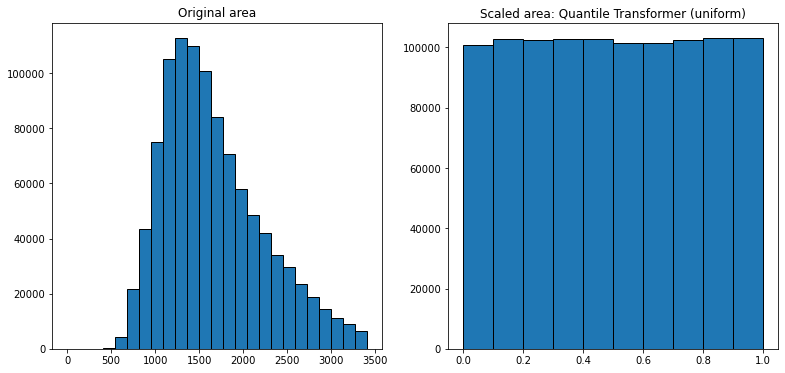

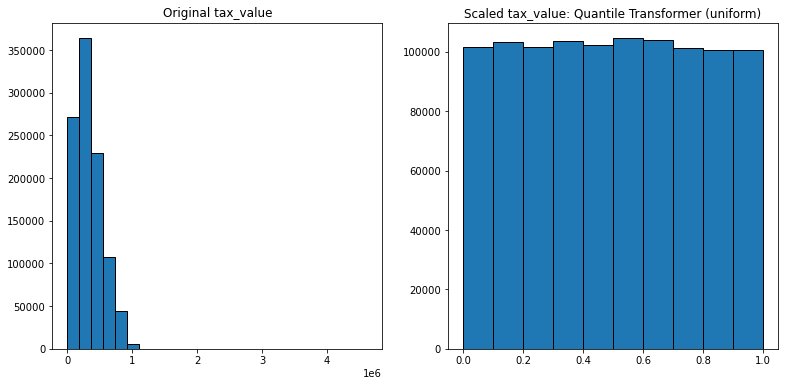

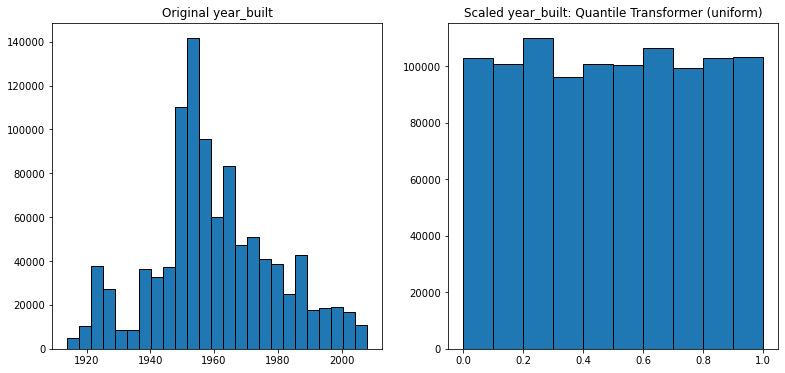

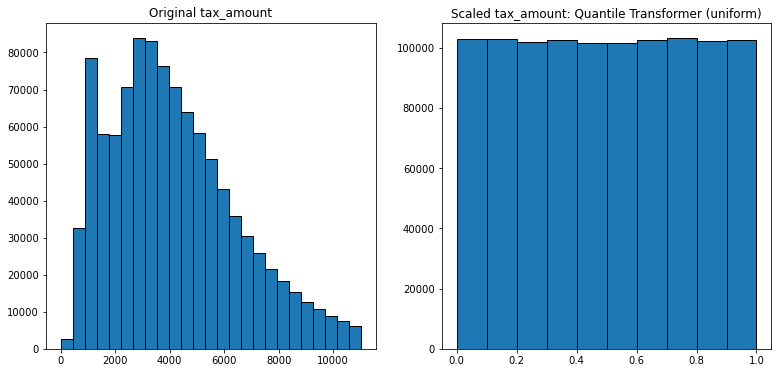

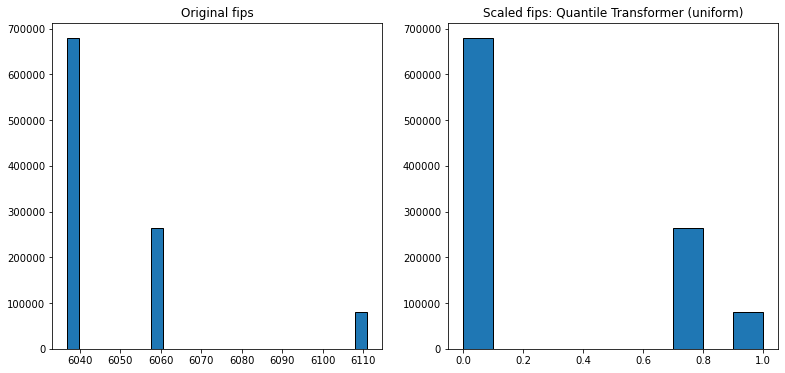

In [36]:
for col in columns:
    scaler = sklearn.preprocessing.QuantileTransformer()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled,  ec='black')
    plt.title(f'Scaled {col}: Quantile Transformer (uniform)')
    plt.show()


In [ ]:
#takeaway
#With uniform quantile scaling the outliers are barely not distinct, they are basically invisible


### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [52]:
#Write function to scale data for zillow data
def scale_data(train, validate, test, features_to_scale):
    """Scales the 3 data splits using MinMax Scaler. 
    Takes in train, validate, and test data splits as well as a list of the features to scale. 
    Returns dataframe with scaled counterparts on as columns"""
    
    
    # Make the thing to train data only
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[features_to_scale])
    
    # Fit the thing with new column names with _scaled added on
    scaled_columns = [col+"_scaled" for col in features_to_scale]
    
    # Transform the separate datasets using the scaler learned from train
    scaled_train = scaler.transform(train[features_to_scale])
    scaled_validate = scaler.transform(validate[features_to_scale])
    scaled_test = scaler.transform(test[features_to_scale])
    
    # Apply the scaled data to the original unscaled data
    train_scaled = pd.concat([train, pd.DataFrame(scaled_train,index=train.index, columns = scaled_columns)],axis=1)
    validate_scaled = pd.concat([validate, pd.DataFrame(scaled_validate,index=validate.index, columns = scaled_columns)],axis=1)
    test_scaled = pd.concat([test, pd.DataFrame(scaled_test,index=test.index, columns = scaled_columns)],axis=1)

    return train_scaled, validate_scaled, test_scaled

In [53]:
features_to_scale = ['area', 'tax_value',
       'year_built', 'tax_amount']

In [54]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, features_to_scale)
train_scaled

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,area_scaled,tax_value_scaled,year_built_scaled,tax_amount_scaled
1927212,3,2.0,2365,529671,1976,5644.78,6111,0.693686,0.114692,0.659574,0.511913
539627,4,3.0,2434,161495,1960,2103.93,6037,0.713950,0.034966,0.489362,0.189733
1231220,3,2.0,1751,104395,1920,1405.93,6037,0.513363,0.022601,0.063830,0.126222
877619,3,2.0,1532,500000,1961,5839.49,6037,0.449046,0.108267,0.500000,0.529630
665807,3,2.0,1680,656866,1963,7692.52,6059,0.492511,0.142236,0.521277,0.698236
...,...,...,...,...,...,...,...,...,...,...,...
1055694,3,2.0,1675,282434,1979,3180.38,6111,0.491043,0.061155,0.691489,0.287678
488948,3,3.0,2146,412986,1946,5557.57,6037,0.629369,0.089425,0.340426,0.503978
1828724,5,2.0,1775,456392,1963,5361.96,6059,0.520411,0.098824,0.521277,0.486180
1189611,4,1.0,1440,353677,1950,4616.24,6037,0.422026,0.076582,0.382979,0.418327


In [55]:
test_scaled

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,area_scaled,tax_value_scaled,year_built_scaled,tax_amount_scaled
2038356,4,4.0,3182,138524,1915,2197.21,6037,0.933627,0.029992,0.010638,0.198220
1643278,4,2.0,1406,252798,1962,3415.23,6037,0.412041,0.054737,0.510638,0.309047
2076475,4,2.5,2542,362001,1977,3681.90,6059,0.745668,0.078384,0.670213,0.333311
750992,3,2.5,1597,293798,1954,3568.88,6059,0.468135,0.063615,0.425532,0.323028
1603003,3,3.0,1319,432776,1995,5405.84,6059,0.386490,0.093710,0.861702,0.490172
...,...,...,...,...,...,...,...,...,...,...,...
278462,5,2.0,1900,304474,1962,3420.08,6059,0.557122,0.065927,0.510638,0.309489
1361012,2,1.0,1180,759579,1947,8730.13,6037,0.345668,0.164478,0.351064,0.792648
1635428,3,2.5,1560,324166,1985,3405.44,6059,0.457269,0.070191,0.755319,0.308156
2096534,3,2.0,1117,261131,1958,3181.44,6059,0.327166,0.056542,0.468085,0.287775


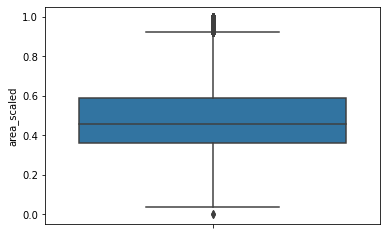

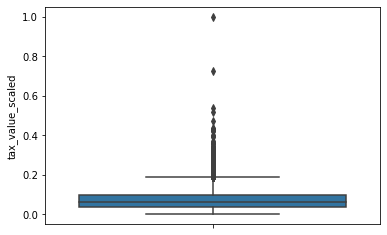

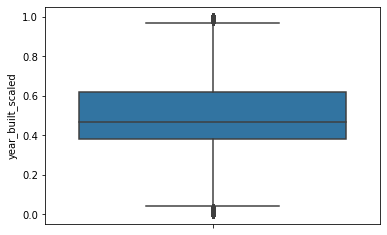

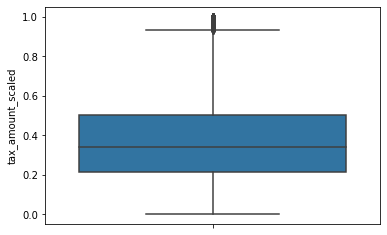

In [56]:
cols = [col for col in train_scaled.columns if 'scale' in col]
for col in cols:
    sns.boxplot(data = train_scaled, y = train_scaled[col])
    plt.show()